In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 전처리 한 것 불러오기

참고로 amount, inout, weather는 1년 전으로 맞춰놓음

## train, test 돌린 data

In [ ]:
import pandas as pd
PATIW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/PATIW.csv')

In [ ]:
PATIW.head()

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4


In [ ]:
PATIW[PATIW['year'] == 21]

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,1505.00,서귀포,8,15,18,8,18,21,3,955,7594,72489,4192.700,1.76,9.4,9.7,12.3,13.9,18.7,22.4,23.4,27.4,22.1,18.5,15.1,8.3,12.4,13.2,15.4,17.7,21.9,25.2,25.7,29.6,25.1,22.1,18.3,12.1,6.6,6.2,8.9,10.3,15.8,20.1,21.5,25.6,19.5,15.4,11.9,5.1,110.1,95.5,132.2,81.8,244.0,406.1,322.0,159.2,424.9,39.2,11.7,62.9,127.7,176.4,213.6,265.3,196.7,151.6,112.9,183.0,164.6,217.4,175.3,182.4
4809,1202.81,서귀포,8,28,70,8,18,21,3,955,7594,72489,4192.700,1.76,9.4,9.7,12.3,13.9,18.7,22.4,23.4,27.4,22.1,18.5,15.1,8.3,12.4,13.2,15.4,17.7,21.9,25.2,25.7,29.6,25.1,22.1,18.3,12.1,6.6,6.2,8.9,10.3,15.8,20.1,21.5,25.6,19.5,15.4,11.9,5.1,110.1,95.5,132.2,81.8,244.0,406.1,322.0,159.2,424.9,39.2,11.7,62.9,127.7,176.4,213.6,265.3,196.7,151.6,112.9,183.0,164.6,217.4,175.3,182.4
4810,1423.52,서귀포,8,16,46,8,18,21,3,955,7594,72489,4192.700,1.76,9.4,9.7,12.3,13.9,18.7,22.4,23.4,27.4,22.1,18.5,15.1,8.3,12.4,13.2,15.4,17.7,21.9,25.2,25.7,29.6,25.1,22.1,18.3,12.1,6.6,6.2,8.9,10.3,15.8,20.1,21.5,25.6,19.5,15.4,11.9,5.1,110.1,95.5,132.2,81.8,244.0,406.1,322.0,159.2,424.9,39.2,11.7,62.9,127.7,176.4,213.6,265.3,196.7,151.6,112.9,183.0,164.6,217.4,175.3,182.4
4811,1287.34,서귀포,0,15,18,8,18,21,1,955,7594,72489,2686.011,3.76,9.4,9.7,12.3,13.9,18.7,22.4,23.4,27.4,22.1,18.5,15.1,8.3,12.4,13.2,15.4,17.7,21.9,25.2,25.7,29.6,25.1,22.1,18.3,12.1,6.6,6.2,8.9,10.3,15.8,20.1,21.5,25.6,19.5,15.4,11.9,5.1,110.1,95.5,132.2,81.8,244.0,406.1,322.0,159.2,424.9,39.2,11.7,62.9,127.7,176.4,21

In [ ]:
PATIW[PATIW['weather'] == '영천']['kind']

0        4
1        4
2        0
3        4
4        4
        ..
22682    4
22683    0
22684    0
22685    0
22686    2
Name: kind, Length: 750, dtype: int64

In [ ]:
PATIW['year'].unique()

array([21, 20, 19, 18, 17])

In [ ]:
PATIW

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23786,819.59,여수,8,5,23,6,22,17,5,9521,5981,569472,943.504,833.01,2.5,4.3,9.0,14.5,18.9,21.9,25.3,27.7,23.0,18.3,11.4,6.4,5.9,8.6,12.9,18.2,22.8,24.4,27.8,31.3,25.5,21.0,14.9,10.2,-0.1,0.8,5.7,11.6,15.6,19.9,23.4,24.9,21.1,16.0,8.2,3.1,51.2,65.5,86.6,301.0,124.3,162.2,157.8,33.8,317.2,150.0,77.7,89.3,183.3,221.0,220.2,192.1,247.5,152.8,221.2,301.2,130.8,126.1,182.2,193.2
23787,872.83,서귀포,0,11,1,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2,173.8,205.5,180.6,189.1,110.9,176.7,282.7,126.0,97.9,155.1,162.5
23788,731.67,서귀포,7,10,30,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2,173.8,205.5,180.6,189.1,110.9,176.7,282.7,126.0,97.9,155.1,162.5
23789,774.76,서귀포,8,10,75,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2

* x = kind, year, month, area, ratio, amount, inn, out,,,
* area 이후로는 작년 거 즉 2019년도와 2020년을 삽입

In [ ]:
PATIW.drop(['market', 'corp', 'wide', 'city', 'area', 'amount'], axis = 1, inplace = True)

In [ ]:
PATIW.head()

,price,weather,kind,year,month,ratio,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,21,10,8098,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,21,10,8098,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,21,10,8098,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,21,9,8098,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,21,9,8098,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4


## future 데이터 작업

In [ ]:
import pandas as pd

future = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/future.csv', encoding = 'cp949')
amount = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/amount2.csv')
inout = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/inout.csv')
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/weather3.csv')

In [ ]:
future['year'].unique()

array([20, 21])

In [ ]:
future                # 1920

,weather,kind,wide,city,year,month
0,영천,4,2,26,20,12
1,영천,0,2,26,20,12
2,영천,7,2,26,20,12
3,영천,6,2,26,20,12
4,영천,4,2,26,20,11
...,...,...,...,...,...,...
1915,여수,7,6,22,21,3
1916,여수,2,6,22,21,3
1917,여수,8,6,22,21,3
1918,여수,6,6,22,21,3


In [ ]:
encoder5 = pd.DataFrame({'city':[]})

In [ ]:
encoder4 = pd.DataFrame({'wide':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                        '광역산지':['경기', '경남', '경북', '광주', '대구', '부산', '전남', '전북', '제주', '충남']})
encoder4

,wide,광역산지
0,0,경기
1,1,경남
2,2,경북
3,3,광주
4,4,대구
5,5,부산
6,6,전남
7,7,전북
8,8,제주
9,9,충남


In [ ]:
fe = pd.merge(future, encoder4, on = ['wide'])

In [ ]:
fe                    # 1727

,weather,kind,wide,city,year,month,광역산지
0,영천,4,2,26,20,12,경북
1,영천,0,2,26,20,12,경북
2,영천,7,2,26,20,12,경북
3,영천,6,2,26,20,12,경북
4,영천,4,2,26,20,11,경북
...,...,...,...,...,...,...,...
1915,서귀포,0,8,18,21,3,제주
1916,서귀포,7,8,18,21,3,제주
1917,서귀포,8,8,18,21,3,제주
1918,서귀포,0,8,18,21,2,제주


In [ ]:
amount.head()

,재배면적,재배비율,생산량,연,광역산지
0,0,0,0,14,서울
1,23,8265,1901,14,부산
2,81,6909,5596,14,대구
3,25,2294,573,14,인천
4,58,7443,4317,14,광주


In [ ]:
amount.columns = ['area',	'ratio',	'amount', 'year', '광역산지']

In [ ]:
fea = pd.merge(fe, amount, on = ['year', '광역산지'])     # 1727

In [ ]:
fea

,weather,kind,wide,city,year,month,광역산지,area,ratio,amount
0,영천,4,2,26,20,12,경북,3309,7471,247231
1,영천,0,2,26,20,12,경북,3309,7471,247231
2,영천,7,2,26,20,12,경북,3309,7471,247231
3,영천,6,2,26,20,12,경북,3309,7471,247231
4,영천,4,2,26,20,11,경북,3309,7471,247231
...,...,...,...,...,...,...,...,...,...,...
1915,서귀포,0,8,18,21,3,제주,955,7594,72489
1916,서귀포,7,8,18,21,3,제주,955,7594,72489
1917,서귀포,8,8,18,21,3,제주,955,7594,72489
1918,서귀포,0,8,18,21,2,제주,955,7594,72489


In [ ]:
inout

In [ ]:
feai = pd.merge(fea, inout, on = ['year', 'month'])
feai

,weather,kind,wide,city,year,month,광역산지,area,ratio,amount,inn,out
0,영천,4,2,26,20,12,경북,3309,7471,247231,1447.099,1.66
1,영천,0,2,26,20,12,경북,3309,7471,247231,1447.099,1.66
2,영천,7,2,26,20,12,경북,3309,7471,247231,1447.099,1.66
3,영천,6,2,26,20,12,경북,3309,7471,247231,1447.099,1.66
4,의성,4,2,29,20,12,경북,3309,7471,247231,1447.099,1.66
...,...,...,...,...,...,...,...,...,...,...,...,...
1915,부여,4,9,11,21,1,충남,693,6620,45885,2686.011,3.76
1916,부여,0,9,11,21,1,충남,693,6620,45885,2686.011,3.76
1917,부여,2,9,11,21,1,충남,693,6620,45885,2686.011,3.76
1918,제주,0,8,32,21,1,제주,955,7594,72489,2686.011,3.76


In [ ]:
feai[feai['month'] == 9]

In [ ]:
feai['year'].unique()

array([21, 22])

In [ ]:
weather.head()

,weather,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12,year
0,강릉,-0.1,0.4,5.7,13.3,17.6,20.6,25.3,25.1,20.2,15.8,7.8,-0.1,4.1,5.1,9.6,18.3,21.9,24.1,28.9,28.4,24.1,20.8,12.3,4.4,-3.2,-3.8,1.9,8.6,13.6,17.5,22.1,22.3,16.9,11.4,4.0,-3.8,39.0,23.1,126.7,126.5,52.7,26.8,261.2,295.3,290.7,10.6,25.6,43.2,196.6,208.4,180.2,211.1,219.3,121.2,182.7,91.5,176.7,232.3,203.6,194.9,13
1,강릉,-0.5,1.8,7.4,10.8,18.1,21.5,27.0,28.5,20.8,15.8,8.8,3.1,4.0,6.7,12.2,15.3,23.1,25.0,30.7,32.5,24.6,20.4,13.1,7.2,-4.3,-2.5,2.7,6.1,13.6,18.4,23.9,25.3,17.7,11.9,4.8,-0.3,54.6,13.6,81.8,58.0,78.7,36.0,241.9,54.6,135.5,130.8,9.8,26.4,194.3,203.0,238.7,229.7,244.4,173.6,166.0,240.5,142.8,193.5,214.3,197.9,14
2,강릉,2.3,1.3,8.3,14.1,20.0,20.9,26.1,23.7,20.9,15.9,10.5,1.1,6.4,5.3,12.7,18.7,24.8,24.3,30.1,26.7,25.1,20.6,14.5,5.6,-2.0,-1.8,3.6,9.5,14.9,17.9,22.5,20.9,17.4,11.8,6.8,-3.2,45.6,169.4,55.3,189.3,9.9,55.7,109.5,336.9,212.1,120.2,84.5,0.4,183.3,107.9,192.9,190.7,259.0,122.5,220.7,123.9,189.9,206.1,173.5,227.9,15
3,강릉,2.2,3.1,8.2,12.1,20.0,21.0,23.8,25.8,20.2,16.0,9.9,4.9,6.4,7.4,13.4,16.7,25.1,25.1,27.2,29.7,24.4,21.0,12.9,8.9,-1.5,-0.6,2.9,7.5,14.8,17.2,20.7,22.4,16.6,11.5,7.2,1.6,20.4,13.1,22.1,76.8,3.1,175.0,62.9,224.8,70.0,21.0,348.9,9.3,185.5,186.3,277.1,188.8,288.3,184.0,173.7,235.7,206.3,255.4,97.7,174.2,16
4,강릉,0.4,1.9,7.9,14.1,19.3,21.9,24.1,25.8,20.6,15.6,9.1,5.0,4.7,6.0,12.4,19.3,24.9,25.9,27.6,29.8,24.3,19.8,13.6,9.2,-3.1,-1.6,3.7,9.2,14.2,18.3,21.2,22.2,17.6,12.2,4.7,1.2,27.4,48.5,29.3,73.0,33.6,40.7,424.2,282.6,104.8,78.1,33.5,82.5,232.8,213.9,207.0,237.6,285.9,205.1,141.2,235.5,125.4,151.3,189.8,183.9,17


In [ ]:
weather['year'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [ ]:
feaiw = pd.merge(feai, weather, on = ['year', 'weather'])
feaiw.head()                                              # 1727

,weather,kind,wide,city,year,month,광역산지,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,영천,4,2,26,20,12,경북,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
1,영천,0,2,26,20,12,경북,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
2,영천,7,2,26,20,12,경북,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
3,영천,6,2,26,20,12,경북,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
4,영천,4,2,26,20,11,경북,3309,7471,247231,3125.007,1558.051,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9


In [ ]:
feaiw[feaiw['weather'] == '광주']

,weather,kind,wide,year,month,광역산지,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
310,광주,4,6,21,12,전남,5743,7883,452737,6157.801,1.79,4.6,5.3,9.0,11.5,18.8,23.6,23.4,27.6,21.3,15.700000,10.5,2.700000,9.0,10.6,15.2,18.0,24.4,28.8,26.8,31.6,25.7,21.2,15.600000,7.800000,1.2,0.8,3.8,6.2,14.2,19.6,20.8,24.8,17.9,11.200000,6.400000,-1.100000,74.9,47.8,43.5,55.3,96.8,199.9,533.3,738.1,178.3,12.100000,28.300000,18.700000,136.5,177.0,242.0,278.1,211.3,191.4,69.5,169.8,158.7,227.600000,176.700000,186.500000
311,광주,0,6,21,12,전남,5743,7883,452737,6157.801,1.79,4.6,5.3,9.0,11.5,18.8,23.6,23.4,27.6,21.3,15.700000,10.5,2.700000,9.0,10.6,15.2,18.0,24.4,28.8,26.8,31.6,25.7,21.2,15.600000,7.800000,1.2,0.8,3.8,6.2,14.2,19.6,20.8,24.8,17.9,11.200000,6.400000,-1.100000,74.9,47.8,43.5,55.3,96.8,199.9,533.3,738.1,178.3,12.100000,28.300000,18.700000,136.5,177.0,242.0,278.1,211.3,191.4,69.5,169.8,158.7,227.600000,176.700000,186.500000
312,광주,7,6,21,12,전남,5743,7883,452737,6157.801,1.79,4.6,5.3,9.0,11.5,18.8,23.6,23.4,27.6,21.3,15.700000,10.5,2.700000,9.0,10.6,15.2,18.0,24.4,28.8,26.8,31.6,25.7,21.2,15.600000,7.800000,1.2,0.8,3.8,6.2,14.2,19.6,20.8,24.8,17.9,11.200000,6.400000,-1.100000,74.9,47.8,43.5,55.3,96.8,199.9,533.3,738.1,178.3,12.100000,28.300000,18.700000,136.5,177.0,242.0,278.1,211.3,191.4,69.5,169.8,158.7,227.600000,176.700000,186.500000
313,광주,2,6,21,12,전남,5743,7883,452737,6157.801,1.79,4.6,5.3,9.0,11.5,18.8,23.6,23.4,27.6,21.3,15.700000,10.5,2.700000,9.0,10.6,15.2,18.0,24.4,28.8,26.8,31.6,25.7,21.2,15.600000,7.800000,1.2,0.8,3.8,6.2,14.2,19.6,20.8,24.8,17.9,11.200000,6.400000,-1.100000,74.9,47.8,43.5,55.3,96.8,199.9,533.3,738.1,178.3,12.100000,28.300000,18.700000,136.5,177.0,242.0,278.1,211.3,191.4,69.5,169.8,158.7,227.600000,176.700000,186.500000
314,광주,1,6,21,12,전남,5743,7883,452737,6157.801,1.79,4.6,5.3,9.0,11.5,18.8,23.6,23.4,27.6,21.3,15.700000,10.5,2.700000,9.0,10.6,15.2,18.0,24.4,28.8,26.8,31.6,25.7,21.2,15.600000,7.800000,1.2,0.8,3.8,6.2,14.2,19.6,20.8,24.8,17.9,11.200000,6.400000,-1.100000,74.9,47.8,43.5,55.3,96.8,199.9,533.3,738.1,178.3,12.100000,28.300000,18.700000,136.5,177.0,242.0,278.1,211.3,191.4,69.5,169.8,158.7,227.600000,176.700000,186.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,광주,2,6,22,1,전남,6775,8547,579042,7944.320,14.00,1.4,5.1,10.6,14.9,18.4,23.3,27.0,25.8,22.9,16.388889,9.8,3.011111,6.4,10.7,17.0,20.9,24.0,28.3,31.4,30.3,27.2,21.9,14.911111,7.588889,-2.6,0.4,5.6,9.7,13.4,19.2,23.6,22.5,19.5,11.877778,5.588889,-0.711111,33.0,31.1,122.4,34.2,139.4,118.1,227.6,338.7,131.1,99.866667,54.466667,40.066667,164.3,175.3,220.5,230.4,212.8,200.6,182.3,141.7,124.8,211.955556,172.211111,163.166667
1287,광주,6,6,22,1,전남,6775,8547,579042,7944.320,14.00,1.4,5.1,10.6,14.9,18.4,23.3,27.0,25.8,22.9,16.388889,9.8,3.011111,6.4,10.7,17.0,20.9,24.0,28.3,31.4,30.3,27.2,21.9,14.911111,7.588889,-2.6,0.4,5.6,9.7,13.4,19.2,23.6,22.5,19.5,11.877778,5.588889,-0.711111,33.0,31.1,122.4,34.2,139.4,118.1,227.6,338.7,131.1,99.866667,54.466667,40.066667,164.3,175.3,220.5,230.4,212.8,200.6,182.3,141.7,124.8,211.955556,172.211111,163.166667
1288,광주,1,6,22,1,전남,6775,8547,579042,7944.320,14.00,1.4,5.1,10.6,14.9,18.4,23.3,27.0,25.8,22.9,16.388889,9.8,3.011111,6.4,10.7,17.0,20.9,24.0,28.3,31.4,30.3,27.2,21.9,14.911111,7.588889,-2.6,0.4,5.6,9.7,13.4,19.2,23.6,22.5,19.5,11.877778,5.588889,-0.711111,33.0,31.1,122.4,34.2,139.4,118.1,227.6,338.7,131.1,99.866667,54.466667,40.066667,164.3,175.3,

In [ ]:
feaiw['year'].unique()

array([21, 22])

In [ ]:
feaiw.drop(['광역산지'], axis = 1, inplace = True)
feaiw

,weather,kind,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,영천,4,2,26,20,12,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
1,영천,0,2,26,20,12,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
2,영천,7,2,26,20,12,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
3,영천,6,2,26,20,12,3309,7471,247231,1447.099,1.660,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
4,영천,4,2,26,20,11,3309,7471,247231,3125.007,1558.051,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,제주,8,8,32,21,3,955,7594,72489,4192.700,1.760,8.9,9.1,11.5,13.2,18.8,22.4,24.2,29.4,22.9,18.4,14.1,7.7,11.0,12.3,15.1,16.9,23.4,26.1,27.3,32.8,25.6,21.2,17.3,10.4,7.0,6.1,7.9,9.8,15.6,19.8,21.8,26.8,20.6,16.0,11.2,5.0,116.7,29.8,81.6,82.3,20.6,221.5,184.7,140.4,400.5,53.7,28.2,29.5,47.5,115.7,196.3,261.7,210.0,164.4,114.4,239.5,134.3,180.0,130.3,96.2
1916,제주,6,8,32,21,3,955,7594,72489,4192.700,1.760,8.9,9.1,11.5,13.2,18.8,22.4,24.2,29.4,22.9,18.4,14.1,7.7,11.0,12.3,15.1,16.9,23.4,26.1,27.3,32.8,25.6,21.2,17.3,10.4,7.0,6.1,7.9,9.8,15.6,19.8,21.8,26.8,20.6,16.0,11.2,5.0,116.7,29.8,81.6,82.3,20.6,221.5,184.7,140.4,400.5,53.7,28.2,29.5,47.5,115.7,196.3,261.7,210.0,164.4,114.4,239.5,134.3,180.0,130.3,96.2
1917,제주,5,8,32,21,3,955,7594,72489,4192.700,1.760,8.9,9.1,11.5,13.2,18.8,22.4,24.2,29.4,22.9,18.4,14.1,7.7,11.0,12.3,15.1,16.9,23.4,26.1,27.3,32.8,25.6,21.2,17.3,10.4,7.0,6.1,7.9,9.8,15.6,19.8,21.8,26.8,20.6,16.0,11.2,5.0,116.7,29.8,81.6,82.3,20.6,221.5,184.7,140.4,400.5,53.7,28.2,29.5,47.5,115.7,196.3,261.7,210.0,164.4,114.4,239.5,134.3,180.0,130.3,96.2
1918,제주,6,8,32,21,2,955,7594,72489,2144.811,20.190,8.9,9.1,11.5,13.2,18.8,22.4,24.2,29.4,22.9,18.4,14.1,7.7,11.0,12.3,15.1,16.9,23.4,26.1,27.3,32.8,25.6,21.2,17.3,10.4,7.0,6.1,7.9,9.8,15.6,19.8,21.8,26.8,20.6,16.0,11.2,5.0,116.7,29.8,81.6,82.3,20.6,221.5,184.7,140.4,400.5,53.7,28.2,29.5,47.5,115.7,196.3,261.7,210.0,164.4,114.4,239.5,134.3,180.0,130.3,96.2


In [ ]:
feaiw.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/feaiw.csv', index = False)

In [ ]:
top = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/시군산지_기후관측소기준 TOP39.csv')
top.head()

,시군산지,기후관측소기준
0,무안,목포
1,함평,영광
2,창녕,밀양
3,신안,목포
4,합천,합천


In [ ]:
top.columns = ['city', 'weather']
top.head()

,city,weather
0,무안,목포
1,함평,영광
2,창녕,밀양
3,신안,목포
4,합천,합천


In [ ]:
top

In [ ]:
feaiwt = pd.merge(feaiw, top, on = ['weather'])
feaiwt.head()

,weather,kind,wide,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12,city
0,영천,4,2,21,12,2365,8098,191509,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,영천
1,영천,0,2,21,12,2365,8098,191509,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,영천
2,영천,7,2,21,12,2365,8098,191509,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,영천
3,영천,6,2,21,12,2365,8098,191509,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,영천
4,영천,4,2,21,11,2365,8098,191509,4786.045,2.016,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,영천


In [ ]:
feaiwt.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/feaiwt.csv', index = False)

In [ ]:
import pandas as pd
feaiw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/feaiw.csv')

In [ ]:
feaiw['weather'].unique()

array(['영천', '의성', '합천', '구미', '안동', '문경', '영주', '추풍령', '대구', '밀양', '산청',
       '의령군', '북창원', '거창', '목포', '해남', '강진군', '광주', '고흥', '장흥', '고창',
       '전주', '군산', '부안', '서울', '부산', '서산', '부여', '제주', '서귀포', '여수'],
      dtype=object)

In [ ]:
feaiw['weather'].unique().counts()

AttributeError: ignored

In [ ]:
feaiw

,weather,kind,year,month,ratio,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,영천,4,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.800000,8.300000,0.600000,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.600000,14.900000,7.100000,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.100000,2.200000,-5.100000,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.100000,32.8,0.900000,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.300000,160.800000,172.400000
1,영천,0,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.800000,8.300000,0.600000,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.600000,14.900000,7.100000,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.100000,2.200000,-5.100000,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.100000,32.8,0.900000,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.300000,160.800000,172.400000
2,영천,7,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.800000,8.300000,0.600000,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.600000,14.900000,7.100000,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.100000,2.200000,-5.100000,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.100000,32.8,0.900000,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.300000,160.800000,172.400000
3,영천,6,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.800000,8.300000,0.600000,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.600000,14.900000,7.100000,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.100000,2.200000,-5.100000,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.100000,32.8,0.900000,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.300000,160.800000,172.400000
4,영천,4,21,11,8098,4786.045,2.016,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.800000,8.300000,0.600000,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.600000,14.900000,7.100000,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.100000,2.200000,-5.100000,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.100000,32.8,0.900000,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.300000,160.800000,172.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,제주,8,22,3,8265,15459.506,2.060,6.8,9.4,12.5,15.4,19.0,23.4,27.8,27.3,24.9,19.033333,13.655556,8.311111,9.8,12.8,16.1,19.2,23.5,27.0,31.1,30.3,28.0,21.977778,16.722222,10.944444,3.9,6.4,9.3,12.2,15.6,20.8,25.5,25.0,22.5,16.433333,10.844444,5.755556,116.6,52.8,81.1,58.8,100.7,122.4,247.1,227.8,493.1,145.177778,69.0,62.855556,96.5,141.2,177.0,216.7,231.5,200.1,171.5,170.5,129.3,164.377778,121.444444,75.866667
1723,제주,6,22,3,8265,15459.506,2.060,6.8,9.4,12.5,15.4,19.0,23.4,27.8,27.3,24.9,19.033333,13.655556,8.311111,9.8,12.8,16.1,19.2,23.5,27.0,31.1,30.3,28.0,21.977778,16.722222,10.944444,3.9,6.4,9.3,12.2,15.6,20.8,25.5,25.0,22.5,16.433333,10.844444,5.755556,116.6,52.8,81.1,58.8,100.7,122.4,247.1,227.8,493.1,145.177778,69.0,62.855556,96.5,141.2,177.0,216.7,231.5,200.1,171.5,170.5,129.3,164.377778,121.444444,75.866667
1724,제주,5,22,3,8265,15459.506,2.060,6.8,9.4,12.5,15.4,19.0,23.4,27.8,27.3,24.9,19.033333,13.655556,8.311111,9.8,12.8,16.1,19.2,23.5,27.0,31.1,30.3,28.0,21.977778,16.722222,10.944444,3.9,6.4,9.3,12.2,15.6,20.8,25.5,25.0,22.5,16.433333,10.844444,5.755556,116.6,52.8,81.1,58.8,100.7,122.4,247.1,227.8,493.1,145.177778,69.0,62.855556,96.5,141.2,177.0,216.7,231.5,200.1,171.5,170.5,129.3,164.377778,121.444444,75.866667
1725,제주,6,22,2,8265,11292.080,0.140,6.8,9.4,12.5,15.4,19.0

In [ ]:
PATIW['weather'].unique()

array(['영천', '의성', '합천', '구미', '안동', '문경', '영주', '추풍령', '밀양', '산청', '의령군',
       '북창원', '대구', '목포', '해남', '강진군', '광주', '고창', '전주', '군산', '부안', '서울',
       '서산', '거창', '고흥', '여수', '장흥', '부산', '부여', '제주', '서귀포'],
      dtype=object)

## I. Multivariate Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = PATIW.iloc[:, 2:]
y = PATIW.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (19032, 72) (19032,)
Test Data :  (4759, 72) (4759,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

MR = LinearRegression()

scores = cross_val_score(MR, X_train, y_train,
                         scoring = 'neg_mean_squared_error',
                         cv=5)                                

In [ ]:
import numpy as np
np.sqrt(-scores.mean())

269.1228260547613

In [ ]:
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, MR.predict(X_test))
np.sqrt(mse)

267.487983926768

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, MR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.28714660333876013


In [ ]:
MR.predict(feaiw)

array([856.58419032, 874.26284162, 843.32520184, ..., 788.07080086,
       796.37679881, 834.9935424 ])

## V. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5,
                            criterion ='mse',
                            random_state = 2045)

DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2045, splitter='best')

In [ ]:
scores = cross_val_score(DTR, X_train, y_train,
                         scoring = 'neg_mean_squared_error',
                         cv=5)
np.sqrt(-scores.mean())

208.63753503195764

* multivariate regression의 normalize 안 준 값보다 좋아짐

In [ ]:
mse = mean_squared_error(y_test, DTR.predict(X_test))
np.sqrt(mse)

207.5011797341113

In [ ]:
mae = mean_absolute_error(y_test, DTR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.21161886639567662


In [ ]:
DTR.feature_importances_

array([6.01599997e-03, 1.85305164e-01, 3.25755352e-01, 0.00000000e+00,
       3.85563907e-02, 1.59124592e-02, 6.83273581e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.27562056e-01, 0.00000000e+00, 0.00000000e+00, 3.15491673e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.87793259e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00001995e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.28000641e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.10918976e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.45460044e-03,
      

* kind, year, month, ratio, inn, out, rain_12, sun_10, sun_12

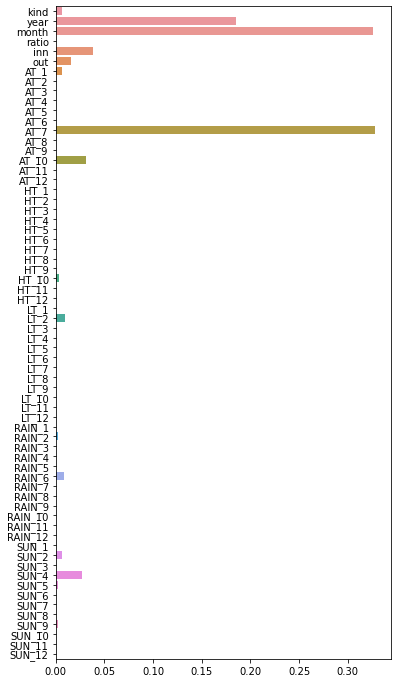

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 12))
sns.barplot(DTR.feature_importances_, PATIW.iloc[:, 2:].columns)
plt.show()

In [ ]:
DTR.predict(feaiw)

array([810.97021978, 810.97021978, 810.97021978, ..., 655.23963526,
       849.28708609, 849.28708609])

## VI. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR2 = RandomForestRegressor(n_estimators = 2000,
                            max_depth = 5,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR2.fit(X_train, y_train)                        ## 2분 41초

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

In [ ]:
scores = cross_val_score(RFR2, X_train, y_train,
                         scoring = 'neg_mean_squared_error',
                         cv=5)
np.sqrt(-scores.mean())                            ## 11분 14초

203.49124815953817

* decision tree보다 성능 좋아짐

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, RFR2.predict(X_test))
np.sqrt(mse)

204.13327182590746

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, RFR2.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.20856199964133285


* kind, year, month, inn, out, sun_4, sun_10, sun_11

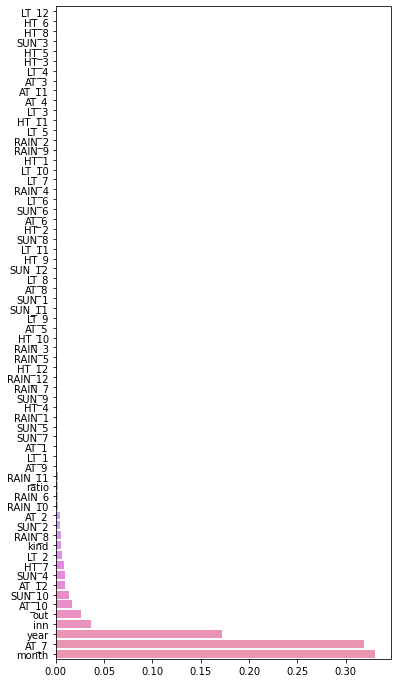

In [ ]:
a, b = (list(a) for a in zip(*sorted(zip(RFR2.feature_importances_, X.columns), reverse = False)))

plt.figure(figsize = (6, 12))
sns.barplot(a, b)
plt.show()

In [ ]:
RFR2.feature_importances_

In [ ]:
RFR2.predict(feaiw.iloc[:, 1:])

array([879.22521831, 879.22521831, 876.50253613, ..., 656.65666504,
       784.53448804, 783.26133072])

## VI-1. feature 제거

* top 1인 month 제거

In [ ]:
PATIW.columns

Index(['price', 'weather', 'kind', 'year', 'month', 'ratio', 'inn', 'out',
       'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9',
       'AT_10', 'AT_11', 'AT_12', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5',
       'HT_6', 'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1',
       'LT_2', 'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

Xm = PATIW[['kind', 'year', 'ratio', 'inn', 'out',
       'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9',
       'AT_10', 'AT_11', 'AT_12', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5',
       'HT_6', 'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1',
       'LT_2', 'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12']]
ym = PATIW.iloc[:, 0]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym,
                                                    test_size = 0.2,
                                                    random_state = 2045)

print('Train Data : ', Xm_train.shape, ym_train.shape)
print('Test Data : ', Xm_test.shape, ym_test.shape)

Train Data :  (19032, 65) (19032,)
Test Data :  (4759, 65) (4759,)


* month 제거 후, 6~7 정도 증가

In [ ]:
scores = cross_val_score(RFR1, Xm_train, ym_train,
                         scoring = 'neg_mean_squared_error',
                         cv=5)
np.sqrt(-scores.mean())                            ## 10분 55초

210.5164960772002

In [ ]:
RFR1.fit(Xm_train, ym_train)                        ## 2분 39초

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

In [ ]:
mse = mean_squared_error(ym_test, RFR1.predict(Xm_test))
np.sqrt(mse)

215.73265767883703

In [ ]:
mae = mean_absolute_error(ym_test, RFR1.predict(Xm_test))
norm=(abs(ym_test).sum())/len(ym_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.217956147894


* month를 제거하니, year의 importance가 낮아짐
* inn, out이 커짐

In [ ]:
a, b = (list(a) for a in zip(*sorted(zip(RFR1.feature_importances_, Xm.columns), reverse = False)))

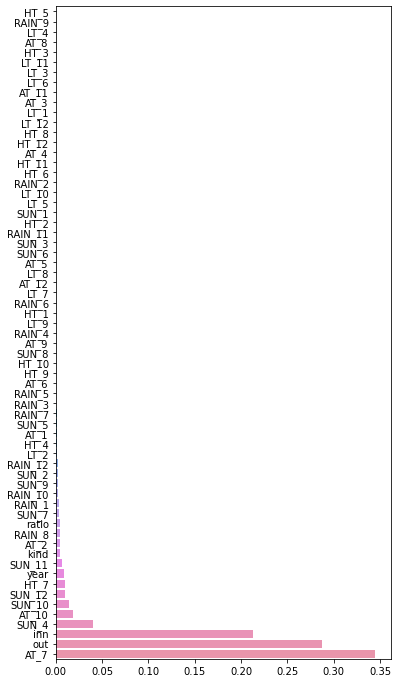

In [ ]:
plt.figure(figsize = (6, 12))
sns.barplot(a, b)
plt.show()

* month 제거 전/후 feature_importance의 bottom 10에서 공통된 feature 제거
* HT5, LT4, HT3, AT11, AT3

In [ ]:
from sklearn.model_selection import train_test_split

Xm = PATIW[['kind', 'year', 'month', 'ratio', 'inn', 'out',
       'AT_1', 'AT_2', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9',
       'AT_10', 'AT_12', 'HT_1', 'HT_2', 'HT_4',
       'HT_6', 'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1',
       'LT_2', 'LT_3', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12']]
ym = PATIW.iloc[:, 0]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym,
                                                    test_size = 0.2,
                                                    random_state = 2045)

print('Train Data : ', Xm_train.shape, ym_train.shape)
print('Test Data : ', Xm_test.shape, ym_test.shape)

Train Data :  (19032, 65) (19032,)
Test Data :  (4759, 65) (4759,)


## 그래프

In [ ]:
feaiw['predict'] = RFR2.predict(feaiw.iloc[:, 1:])
feaiw.head()

,weather,kind,year,month,ratio,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12,predict
0,영천,4,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,879.225218
1,영천,0,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,879.225218
2,영천,7,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,876.502536
3,영천,6,21,12,8098,6157.801,1.790,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,876.502536
4,영천,4,21,11,8098,4786.045,2.016,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4,879.225218


In [ ]:
feaiw['weather'].unique()

array(['영천', '의성', '합천', '구미', '안동', '문경', '영주', '추풍령', '대구', '밀양', '산청',
       '의령군', '북창원', '거창', '목포', '해남', '강진군', '광주', '고흥', '장흥', '고창',
       '전주', '군산', '부안', '서울', '부산', '서산', '부여', '제주', '서귀포', '여수'],
      dtype=object)

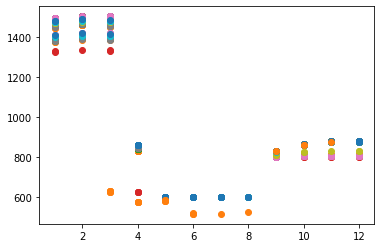

In [ ]:
from matplotlib import pyplot
pyplot.scatter(feaiw[feaiw['weather'] == '영천']['month'], feaiw[feaiw['weather'] == '영천']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '의성']['month'], feaiw[feaiw['weather'] == '의성']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '합천']['month'], feaiw[feaiw['weather'] == '합천']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '안동']['month'], feaiw[feaiw['weather'] == '안동']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '문경']['month'], feaiw[feaiw['weather'] == '문경']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '영주']['month'], feaiw[feaiw['weather'] == '영주']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '추풍령']['month'], feaiw[feaiw['weather'] == '추풍령']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '산청']['month'], feaiw[feaiw['weather'] == '산청']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '거창']['month'], feaiw[feaiw['weather'] == '거창']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '고흥']['month'], feaiw[feaiw['weather'] == '고흥']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '장흥']['month'], feaiw[feaiw['weather'] == '장흥']['predict'])

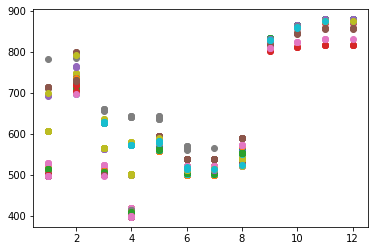

In [ ]:
pyplot.scatter(feaiw[feaiw['weather'] == '구미']['month'], feaiw[feaiw['weather'] == '구미']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '대구']['month'], feaiw[feaiw['weather'] == '대구']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '밀양']['month'], feaiw[feaiw['weather'] == '밀양']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '의령군']['month'], feaiw[feaiw['weather'] == '의령군']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '북창원']['month'], feaiw[feaiw['weather'] == '북창원']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '목포']['month'], feaiw[feaiw['weather'] == '목포']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '해남']['month'], feaiw[feaiw['weather'] == '해남']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '강진군']['month'], feaiw[feaiw['weather'] == '강진군']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '광주']['month'], feaiw[feaiw['weather'] == '광주']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '고창']['month'], feaiw[feaiw['weather'] == '고창']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '전주']['month'], feaiw[feaiw['weather'] == '전주']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '군산']['month'], feaiw[feaiw['weather'] == '군산']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '부안']['month'], feaiw[feaiw['weather'] == '부안']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '서울']['month'], feaiw[feaiw['weather'] == '서울']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '부산']['month'], feaiw[feaiw['weather'] == '부산']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '서산']['month'], feaiw[feaiw['weather'] == '서산']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '부여']['month'], feaiw[feaiw['weather'] == '부여']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '제주']['month'], feaiw[feaiw['weather'] == '제주']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '서귀포']['month'], feaiw[feaiw['weather'] == '서귀포']['predict'])
pyplot.scatter(feaiw[feaiw['weather'] == '여수']['month'], feaiw[feaiw['weather'] == '여수']['predict'])

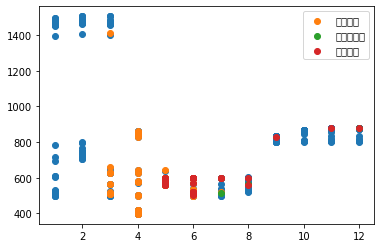

In [ ]:
from matplotlib import pyplot
pyplot.scatter(feaiw[feaiw['kind'] == 0]['month'], feaiw[feaiw['kind'] == 0]['predict'])
pyplot.scatter(feaiw[feaiw['kind'] == 8]['month'], feaiw[feaiw['kind'] == 8]['predict'], label = '조생양파')
pyplot.scatter(feaiw[feaiw['kind'] == 9]['month'], feaiw[feaiw['kind'] == 9]['predict'], label = '중만생양파')
pyplot.scatter(feaiw[feaiw['kind'] == 10]['month'], feaiw[feaiw['kind'] == 10]['predict'], label = '중생양파')
plt.legend()

* train/test 데이터와 비교

In [ ]:
PATIW

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23786,819.59,여수,8,5,23,6,22,17,5,9521,5981,569472,943.504,833.01,2.5,4.3,9.0,14.5,18.9,21.9,25.3,27.7,23.0,18.3,11.4,6.4,5.9,8.6,12.9,18.2,22.8,24.4,27.8,31.3,25.5,21.0,14.9,10.2,-0.1,0.8,5.7,11.6,15.6,19.9,23.4,24.9,21.1,16.0,8.2,3.1,51.2,65.5,86.6,301.0,124.3,162.2,157.8,33.8,317.2,150.0,77.7,89.3,183.3,221.0,220.2,192.1,247.5,152.8,221.2,301.2,130.8,126.1,182.2,193.2
23787,872.83,서귀포,0,11,1,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2,173.8,205.5,180.6,189.1,110.9,176.7,282.7,126.0,97.9,155.1,162.5
23788,731.67,서귀포,7,10,30,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2,173.8,205.5,180.6,189.1,110.9,176.7,282.7,126.0,97.9,155.1,162.5
23789,774.76,서귀포,8,10,75,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2

In [ ]:
PATIW['month'].dtypes

dtype('int64')

In [ ]:
PATIW['month'] = pd.to_datetime(PATIW['month'])

In [ ]:
PATIW['date'] = '20' + PATIW['year'] + '-' + PATIW['month']

ValueError: ignored

In [ ]:
PATIW.head()

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,1970-01-01 00:00:00.000000010,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,1970-01-01 00:00:00.000000010,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,1970-01-01 00:00:00.000000010,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,1970-01-01 00:00:00.000000009,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,1970-01-01 00:00:00.000000009,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4


In [ ]:
from datetime import date
PATIW['month'].isoformat()

AttributeError: ignored

In [ ]:
PATIW['date'] = PATIW['year'] + '-' + PATIW['month']
PATIW.head()

ValueError: ignored

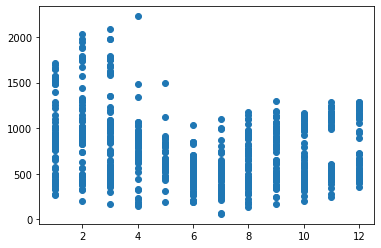

In [ ]:
from matplotlib import pyplot
pyplot.scatter(PATIW[PATIW['weather'] == '영천']['month'], PATIW[PATIW['weather'] == '영천']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '의성']['month'], PATIW[PATIW['weather'] == '의성']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '합천']['month'], PATIW[PATIW['weather'] == '합천']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '안동']['month'], PATIW[PATIW['weather'] == '안동']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '문경']['month'], PATIW[PATIW['weather'] == '문경']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '영주']['month'], PATIW[PATIW['weather'] == '영주']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '추풍령']['month'], PATIW[PATIW['weather'] == '추풍령']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '산청']['month'], PATIW[PATIW['weather'] == '산청']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '거창']['month'], PATIW[PATIW['weather'] == '거창']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '고흥']['month'], PATIW[PATIW['weather'] == '고흥']['price'])
# pyplot.scatter(PATIW[PATIW['weather'] == '장흥']['month'], PATIW[PATIW['weather'] == '장흥']['price'])